*Note to students: this sample final project includes only writing and output without code. You can export your HTML file in the usual way, but if you'd like to produce something in this format I can work with you on that. I made this file more readable using the conversion tool [Quarto](https://quarto.org/), but again you can simply use the standard JupyterHub HTML export if you prefer.*

# Introduction

Opened in 1929, the Museum of Modern Art (MoMA) in New York City has collected modern and contemporary artworks of all kinds for nearly a century. The museum makes their [collection data freely available on Github](https://github.com/MuseumofModernArt/collection), and in this project I will use the `Artworks.csv` data to investigate the 140,848 artworks that MoMA data make available. This is only collection data: the dataset does not include images or other direct depictions of the artworks themselves, instead this dataset contains metadata about the art and the people who made it. As they make clear on their [Github page](https://github.com/MuseumofModernArt/collection), this data is provided "as is" and may include errors or incomplete information. Any alterations I've made to the data are my own, and the analysis is not intended to represent MoMA the institution in any way, in accordance with their data sharing policy. This data is a very small piece of art history: I am investigating a subset of the collection of a single museum. While this analysis may suggest some larger questions about the history of art and museum collections, it can ultimately only *answer* questions about MoMA itself.

There are many stakeholders to this data, including the museum curators, academic art historians, past and future artists, and the general public. From the lens of Positionality, we might consider that art history has typically been dominated by the stories of male artists, while women artists have been more marginalized. Understanding gender in this data could either help to address this imbalance or (if we're not careful in the analysis) reinforce it. Considering things from the lens of Power, it's important to remember that this is data from just one very wealthy museum in New York City. Drawing conclusions about all of modern art from just this data set could potentially mislead readers and give more power to a small set of curators and art patrons.

In this notebook I will look into questions about gender in MoMA's collection. Are there more women artists or men in MoMA's collection? Does this gender breakdown continue over time? Using the artworks' attributes, is it possible to predict the gender for the artists? If it is, what features are most useful for predicting gender, and why? I am expecting, based on what I already know about art history, for their to be more men than women in this dataset, but I am curious if the collection practices of MoMA have gotten more balanced in recent years.

# Data Explanation and Exploration

In this section I will load the data, wrangle it, and begin to explore it with visualizations and summary statistics. While some of the `Artworks.csv` data is already in a tidy form, there are some key transformations that must take place before we can start to answer the research questions above.

In [1]:
# Import the basic data analysis libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
alt.data_transformers.enable("vegafusion")
alt.renderers.enable("png", ppi=144)

# Import scikit-learn libraries for use in the next section
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

In [2]:
# Load the original MoMA data
orig_moma = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/refs/heads/main/Artworks.csv')
orig_moma

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.60000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.64010,NaN,NaN,29.845100,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.30000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.80000,NaN,NaN,50.800000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.40000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157594,Box catalogue for the exhibition JAMES LEE BYA...,James Lee Byars,902,"(American, 1932–1997)",(American),(1932),(1997),(male),1977,Cardboard box containing black tissue paper,...,NaN,NaN,7.5,NaN,20.00000,NaN,NaN,15.700000,NaN,NaN
157595,Box catalogue for the exhibition GEORG ETTL at...,Georg Ettl,74696,"(German, 1940–2014)",(German),(1940),(2014),(male),1978,"Cardboard box containing a typescipt, six card...",...,NaN,NaN,2.7,NaN,20.20000,NaN,NaN,16.000000,NaN,NaN
157596,Box catalogue for the exhibition JANNIS KOUNEL...,Jannis Kounellis,3230,"(Greek, 1936–2017)",(Greek),(1936),(2017),(male),1978,Cardboard box containing four cards and an object,...,NaN,NaN,2.8,NaN,20.30000,NaN,NaN,15.800000,NaN,NaN
157597,Panels for the Walls of the World: Phase II,Stan VanDerBeek,32424,"(American, 1927–1984)",(American),(1927),(1984),(male),1970,"Cut-and-pasted printed papers, spray paint, an...",...,NaN,NaN,0.0,NaN,194.30000,NaN,NaN,609.600000,NaN,NaN


In [3]:
orig_moma.info() #View list of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157599 entries, 0 to 157598
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               157551 non-null  object 
 1   Artist              156330 non-null  object 
 2   ConstituentID       156330 non-null  object 
 3   ArtistBio           151511 non-null  object 
 4   Nationality         156330 non-null  object 
 5   BeginDate           156330 non-null  object 
 6   EndDate             156330 non-null  object 
 7   Gender              156330 non-null  object 
 8   Date                155580 non-null  object 
 9   Medium              148347 non-null  object 
 10  Dimensions          148928 non-null  object 
 11  CreditLine          156043 non-null  object 
 12  AccessionNumber     157599 non-null  object 
 13  Classification      157599 non-null  object 
 14  Department          157599 non-null  object 
 15  DateAcquired        150850 non-nul

As you can see from the data and the column list above, the data has 30 columns and 157,599 rows. Each row represents a unique artwork in MoMA's collection as the unit of observation. Some key variables are the artwork's dimensions (which can vary based on the type of artwork: some works have a height and width, others have a duration, others have a diameter, etc.), the dates that the artwork was made and when it was acquired by MoMA, the classification and department that tells us the artwork's form and genre, and information about the artists who made each work.

There are a few issues with this data that will have to be addressed. Right now the dates are encoded as text data, and to make good visualizations we will want to turn them into datetime data types. However, for statistical modeling, we will also need to encode the dates as numerical variables. A bigger issue is that some artworks have more than one artist. As a result, most of the artist-related fields have information surrounded by parantheses, with different artist info separated by spaces. Once I cleaned up this artist data, I decided to only consider works that have just one artist. This simplifies the analysis for this short project, but it is also somewhat limiting. By doing this bit of data cleaning, I could be missing some key information about how men and women artists are represented in MoMA.

In [4]:
# Clean up columns, remove parentheses, and convert dates to numeric
moma = orig_moma.assign(
            # First clean up artist info
            Nationality=orig_moma.Nationality.replace("()",np.nan).str.replace(r'\(|\)', '', regex=True), 
            ArtistBio=orig_moma.ArtistBio.replace("()",np.nan).str.replace(r'\(|\)', '', regex=True),
            Gender=orig_moma.Gender.replace("()",np.nan).str.replace(r'\(|\)', '', regex=True).str.lower(),
            # Then change dates to datetimes
            BeginDate=pd.to_datetime(orig_moma.BeginDate.replace("(0)",np.nan).str.extract(r'(\d{4})',expand=False)),
            EndDate=pd.to_datetime(orig_moma.EndDate.replace("(0)",np.nan).str.extract(r'(\d{4})',expand=False)),
            Date=pd.to_datetime(orig_moma.Date.str.extract(r'(\d{4})',expand=False)),
            DateAcquired=pd.to_datetime(orig_moma.DateAcquired)
           )

# Add new columns for numeric year data, to use as predictors
moma = moma.assign(BeginYear=pd.to_numeric(moma.BeginDate.dt.year),
                  EndYear=pd.to_numeric(moma.EndDate.dt.year),
                  MadeYear=pd.to_numeric(moma.Date.dt.year),
                  AcquiredYear=pd.to_numeric(moma.DateAcquired.dt.year))

# Remove any row where the Gender column contains a space, which would be any row with more than one artist
moma = moma[moma.Gender.str.contains(r'\s',regex=True,na=False)==False]

# Drop artworks where Gender is null
moma = moma.dropna(subset="Gender")

Now that the data has been processed, we can begin to investigate the gender breakdown.

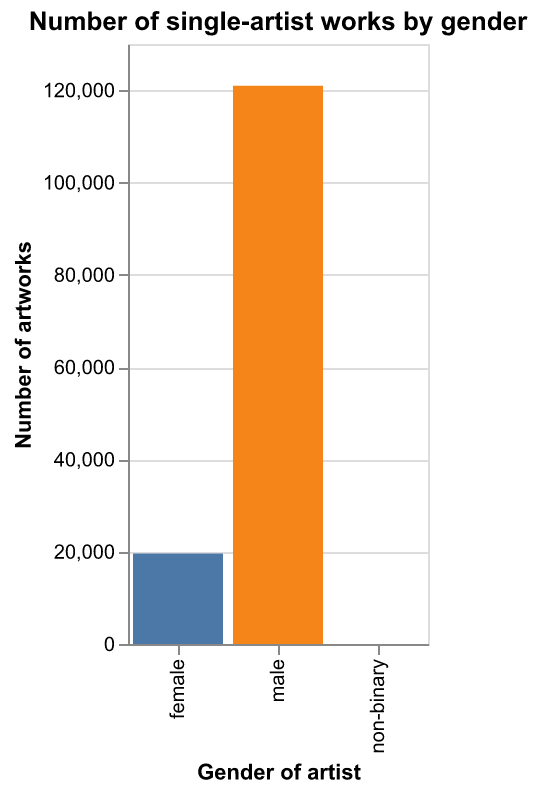

In [5]:
alt.Chart(moma, title="Number of single-artist works by gender").mark_bar().encode(
    x=alt.X("Gender:N", title="Gender of artist"),
    y=alt.Y("count():Q", title="Number of artworks"),
    color=alt.Color("Gender:N", legend=None)
).properties(
    width=alt.Step(50)
)

In [6]:
moma.Gender.value_counts()

Gender
male          120979
female         19608
non-binary        12
Name: count, dtype: int64

The bar plot above shows the gender breakdown of artists in the MoMA data. As you can see from the height of the blue and orange bars, there almost 100,000 more men than women in the data. There are also a few non-binary artists, but these are so few that they aren't visible on the graph. I also counted the values, and you can see that there are 12 non-binary artists, around 19,000 women, and over 120,000 men. It definitely looks like there is a gender imbalance in MoMA's collection.

This graph may be more readable if we use a log scale for the y-axis:

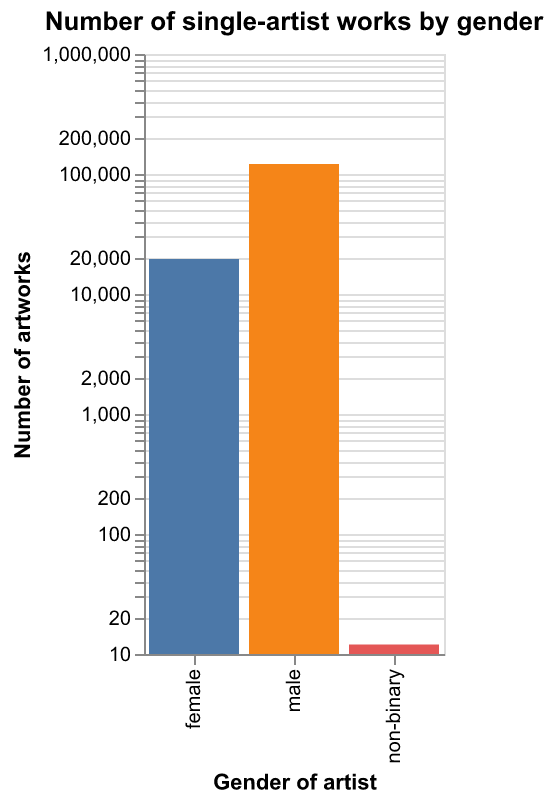

In [7]:
alt.Chart(moma, title="Number of single-artist works by gender").mark_bar().encode(
    x=alt.X("Gender:N", title="Gender of artist"),
    y=alt.Y("count():Q", title="Number of artworks").scale(type="log"),
    color=alt.Color("Gender:N", legend=None)
).properties(
    width=alt.Step(50)
)

The plot above shows the same information as the previous one, but using a log-10 scale for the y-axis shows the exponentially greater number of artworks by men while still making visible the 12 works by non-binary artists. Though it may initially appear on this plot there is a nearly equivalent number of works by men and women, this plot still shows that there are about a hundred thousand more works by men.

While this gender breakdown is useful, it may be more informative to view the artworks broken down by gender and genre.

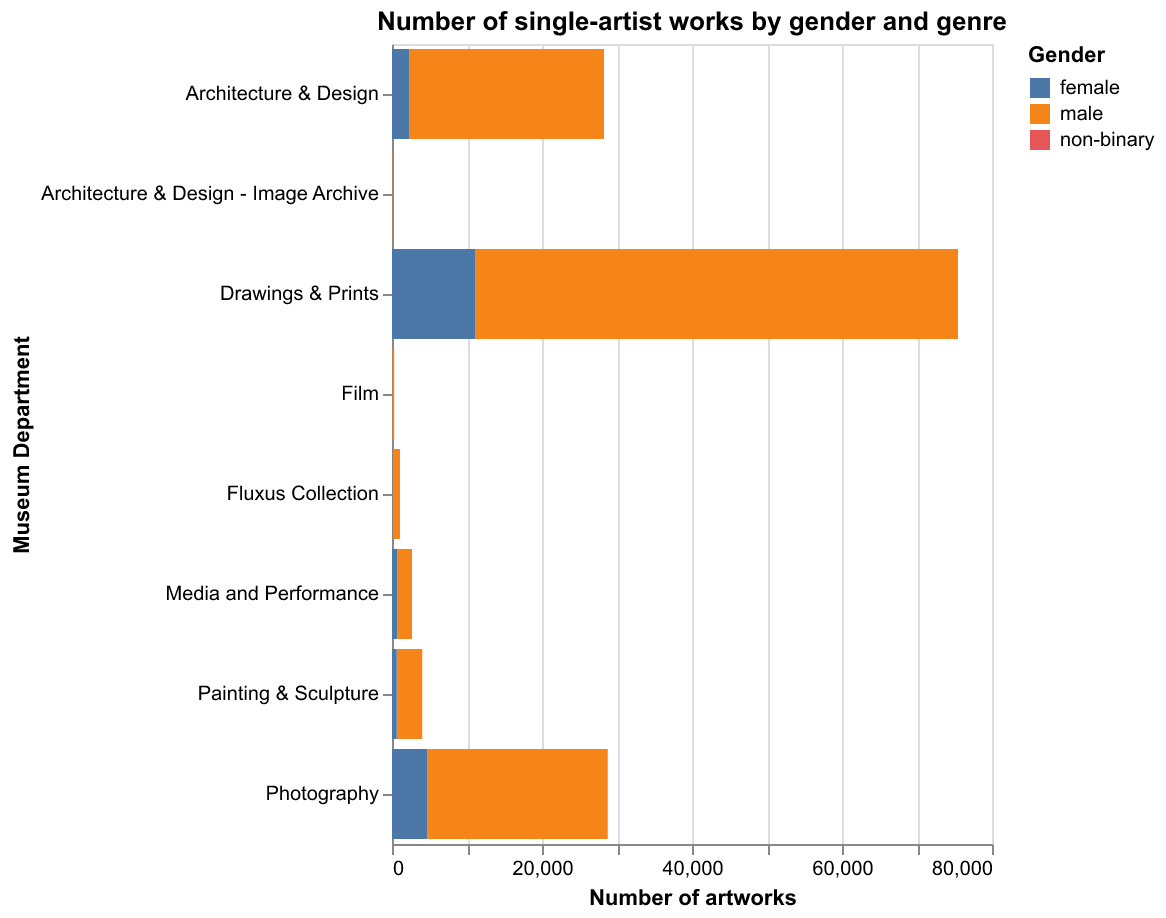

In [8]:
alt.Chart(moma, title="Number of single-artist works by gender and genre").mark_bar().encode(
    x=alt.X("count():Q", title="Number of artworks"),
    y=alt.Y("Department:N", title="Museum Department"),
    color=alt.Color("Gender:N")
).properties(
    height=alt.Step(50)
)

The stacked bar plot above shows the number of artworks in each department of MoMA, which is a way of understanding the genre of the artworks. As you can see from the width of the bars, there are far more Drawings & Prints than any other type of artwork. This is surprising because we might assume that museums mostly hold paintings and sculptures, but so much of a museum's collections aren't on public view. The gender breakdown looks proportionate to the size of each department's collection: there isn't a particular genre that seems to have more women artists relative to its size.

So far I have looked at categorical features, but are there numerical features of the artworks that might tell us about gender differences? And do these features change over time?

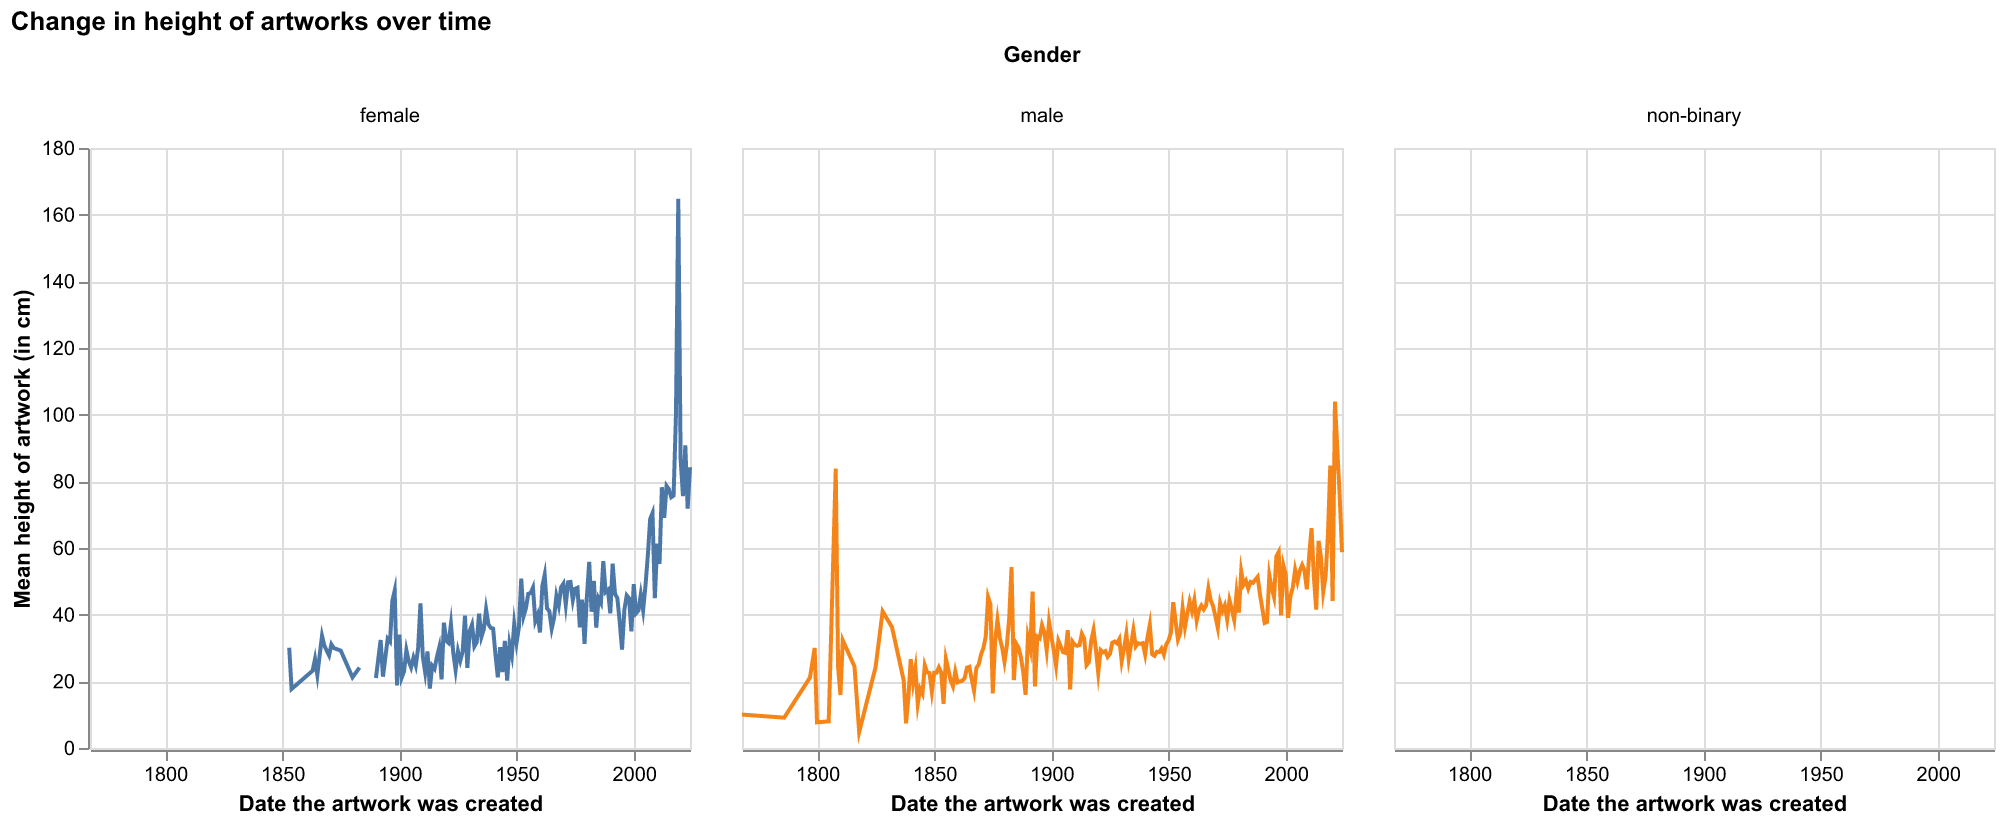

In [9]:
alt.Chart(moma, title="Change in height of artworks over time").mark_line().encode(
    x=alt.X("Date:T", title="Date the artwork was created"),
    y=alt.Y("mean(Height (cm)):Q", title="Mean height of artwork (in cm)"),
    column=alt.Column("Gender:N"),
    color=alt.Color("Gender:N", legend=None)
)

The line plot above shows how the height of the artworks have changed over time, with different plots for each gender category. Not every artwork has a height (e.g. films), but this graph shows all the ones that do. For both male and female artists, works seem to be getting taller over time, particularly in the 21st century. And since 2000, the steepness of the line in the center plot indicates that works by women are growing taller at a faster rate. Is this increase statistically significant, or is this result of a much smaller sample size of women artists? If it is significant, what could motivate women artists to create larger, more monumental artworks?

This plot represents just one way to look at time in the data: using the date on which the artwork was created. We can also look at the date on which the artwork was *acquired* by MoMA, i.e. added to the museum's collection.

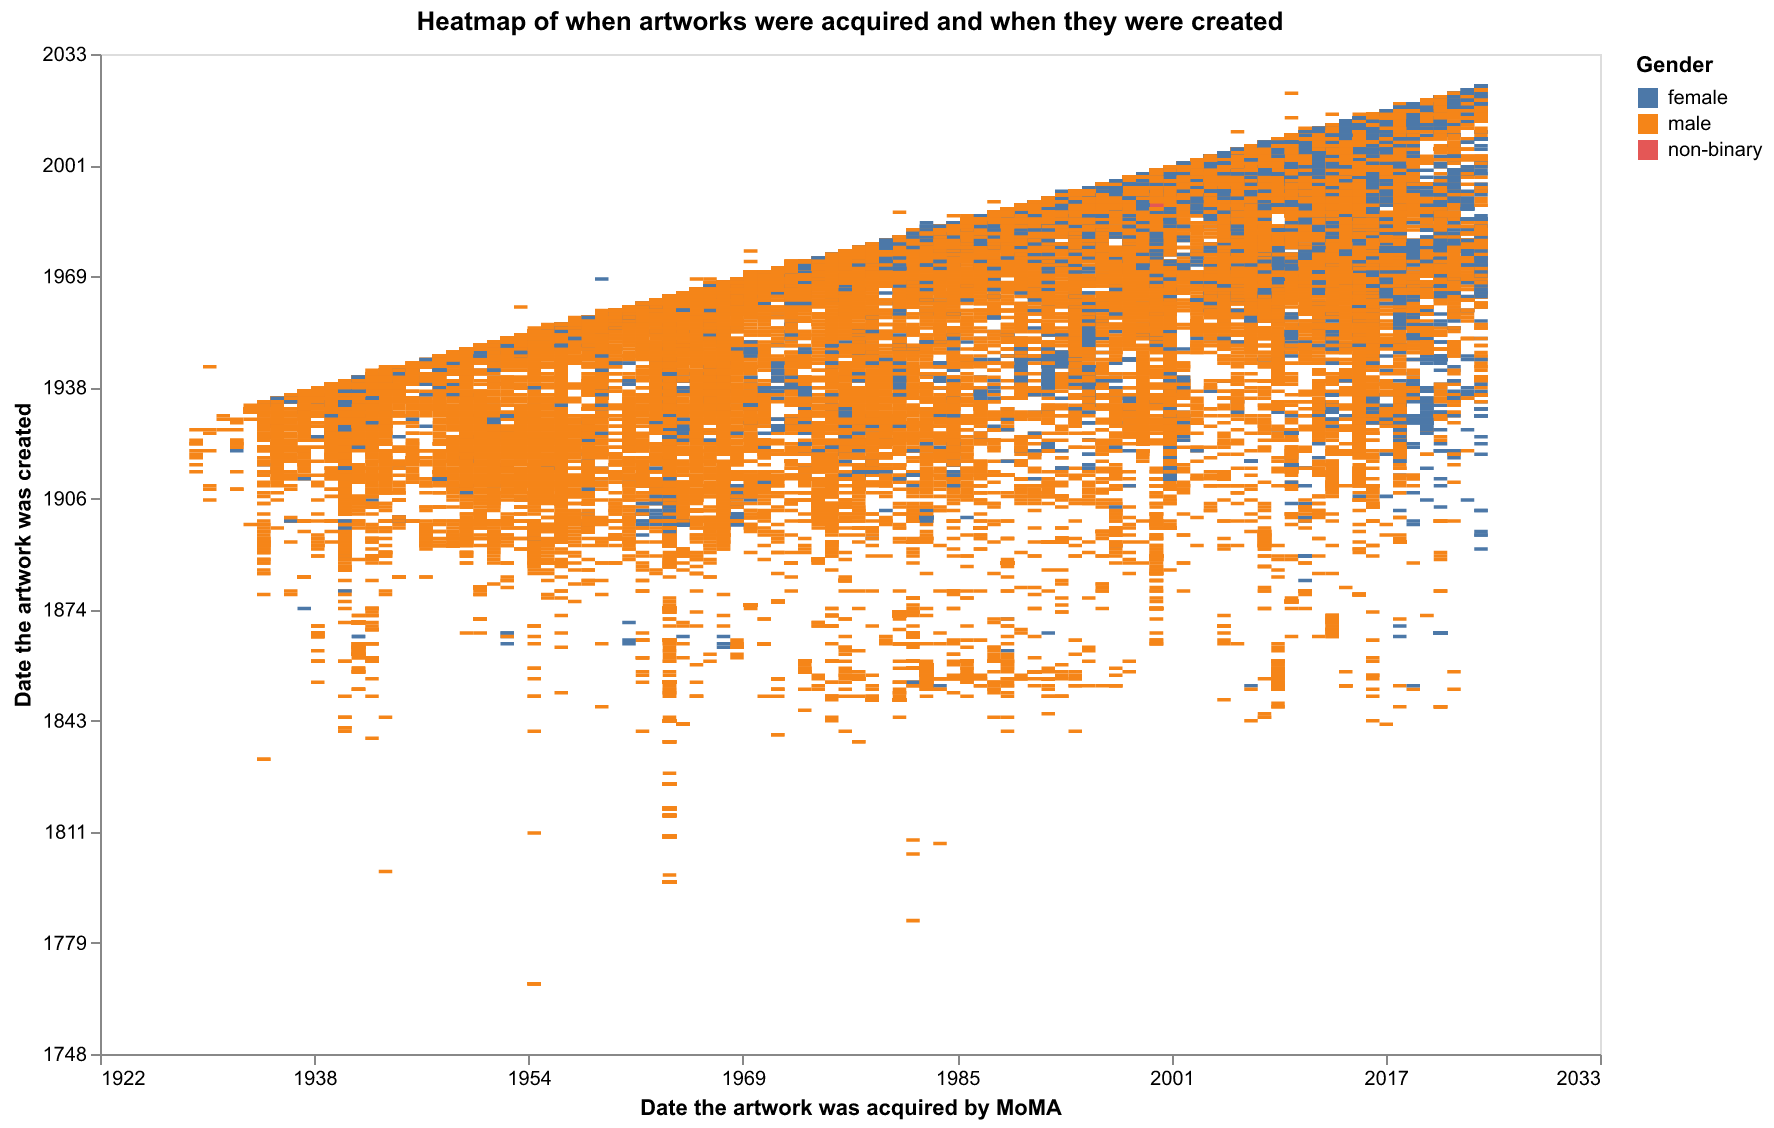

In [10]:
alt.Chart(moma, title="Heatmap of when artworks were acquired and when they were created").mark_rect().encode(
    x=alt.X("year(DateAcquired):T", title="Date the artwork was acquired by MoMA").bin(),
    y=alt.Y("year(Date):T", title="Date the artwork was created").bin(),
    color=alt.Color("Gender:N")
).properties(
    width=750,
    height=500
)

The heatmap above shows when artworks were both acquired by MoMA and created by their respective artists. By the increased amount of blue as the plot moves left to right, we can see that the museum has acquired more works by women over time, and that most of the works by women were created after 1920. The first works by non-binary artists were acquired around the turn of the century and were contemporary works at the time. Over time the museum has continued to acquire contemporary works (from the same year) but also works from the past, especially from 1900 onward. After the early 1980s, the museum stopped collecting any works from before 1940. 

However the most notable thing about this plot is how the proportion of acquired art made by men and women appears to have changed over time. We can see this by digging into specific years of the data.

In [11]:
moma[moma.DateAcquired.dt.year == 1960].Gender.value_counts()

Gender
male      399
female     27
Name: count, dtype: int64

In 1960, male artists created the overwhelming majority of artworks acquired by MoMA. Of 426 artworks acquired, just 27 of them were created by women: men created nearly 15 times as many of the artworks MoMA was adding to its collections.

In [12]:
moma[moma.DateAcquired.dt.year == 2018].Gender.value_counts()

Gender
male          1281
female         915
non-binary       1
Name: count, dtype: int64

By contrast, in 2018, 915 out of 2197 artworks were created by women and non-binary people, so only about 1.4 times as many of the artworks were made by men. This suggests that things changed in MoMA's acquisitions over time, but perhaps not as quickly as we might expect.

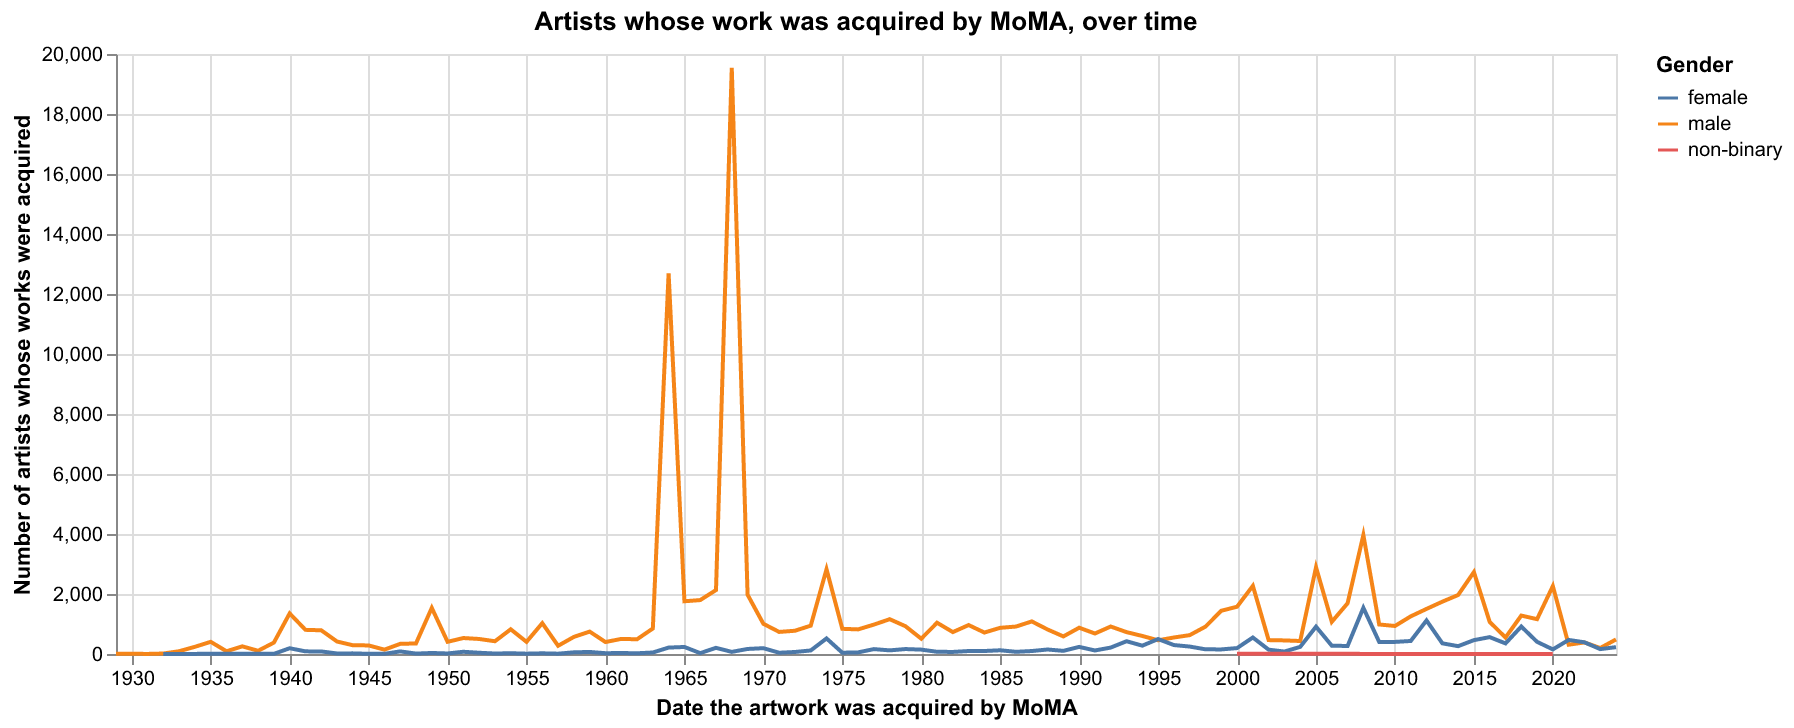

In [13]:
alt.Chart(moma, title="Artists whose work was acquired by MoMA, over time").mark_line().encode(
    x=alt.X("year(DateAcquired):T", title="Date the artwork was acquired by MoMA"),
    y=alt.Y("count(Artist):Q", title="Number of artists whose works were acquired"),
    color=alt.Color("Gender:N")
).properties(
    width=750
)

This line plot lets us expand on the previous calculations. For each year, it shows the number of male, female, and non-binary artists whose work was acquired by the museum. We can see some unexpected trends. Rather than the blue and orange lines coming gradually together as acquisition policies change, we see huge spikes in male artists' followed by more modest increases in works by female and non-binary artists, mostly after 2000. Most of the gender imbalance in the collection was caused by just a few years of acquisition in the late 1960s. While acquisition patterns have changed in the 21st century, it may be a while before things become more balanced.

# Statistical Analysis and Interpretation

## Hypothesis Test

Now that we've identified some differences between when MoMA acquired artworks by men and women, we might want to know if this difference is *statistically significant*. As I mentioned previously, this data contains only a subset of the artworks available in MoMA's collection, and we further limited that dataset above by looking at only single-artist works. Are the differences we see between men and women in this data the result of randomness in our sample, or is it likely that MoMA's collection overall has more works by women acquired more frequently.

We can use a permutation test to compare the mean acquired year for men and women in the MoMA data. To do so, we'll need to define a null and alternative hypothesis:

$H_0: mean(AcquiredYearMale) = mean(AcquiredYearFemale)$  
$H_1: mean(AcquiredYearMale) < mean(AcquiredYearFemale)$

My null hypothesis states that there is no difference between the average year that works by men were acquired and the average year that works by women were acquired. My alternative hypothesis states that on average works by men were acquired *earlier* than works by women. This is a one-tailed alternative hypothesis, meaning that I am only testing in one direction. To understand why I made that choice, we can plot the difference in distributions between men and women.

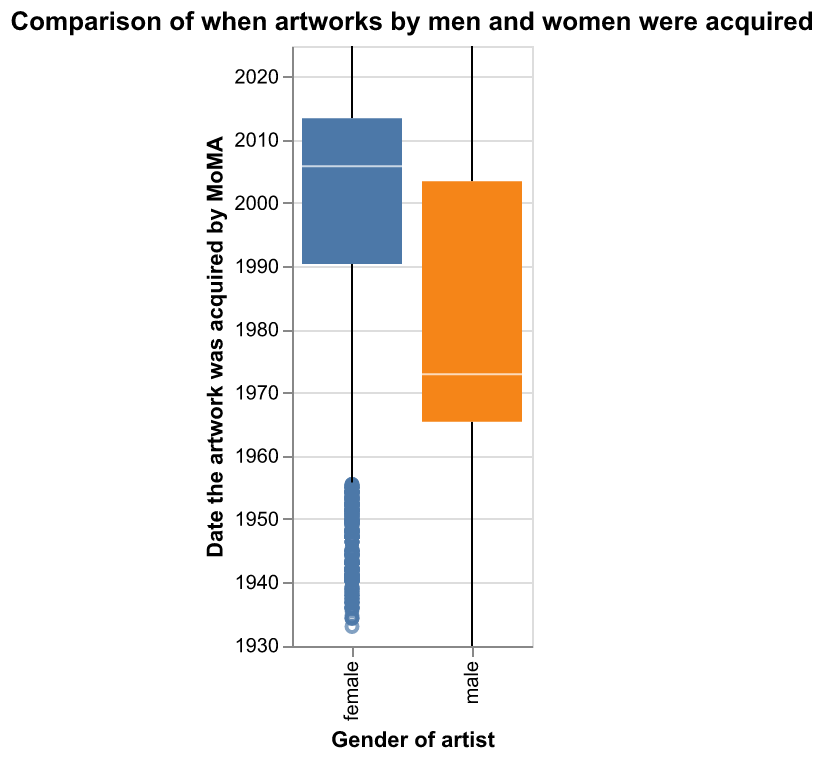

In [14]:
# Filter out non-binary artists to make direct comparison between male and female artists possible
moma = moma[moma.Gender != 'non-binary']

alt.Chart(moma, title="Comparison of when artworks by men and women were acquired").mark_boxplot(size=50).encode(
    x=alt.X("Gender:N", title="Gender of artist"),
    y=alt.Y("year(DateAcquired):T", title="Date the artwork was acquired by MoMA"),
    color=alt.Color("Gender:N", legend=None)
).properties(
    width=alt.Step(60)
)

This box plot shows the difference in the distributions of when artworks by men and women were acquired by the museum. The large difference between the two median lines and the different locations of the two boxes indicates that artworks by women were generally acquired more recently. Since a permutation test compares the means, we can also view this difference as a bar plot.

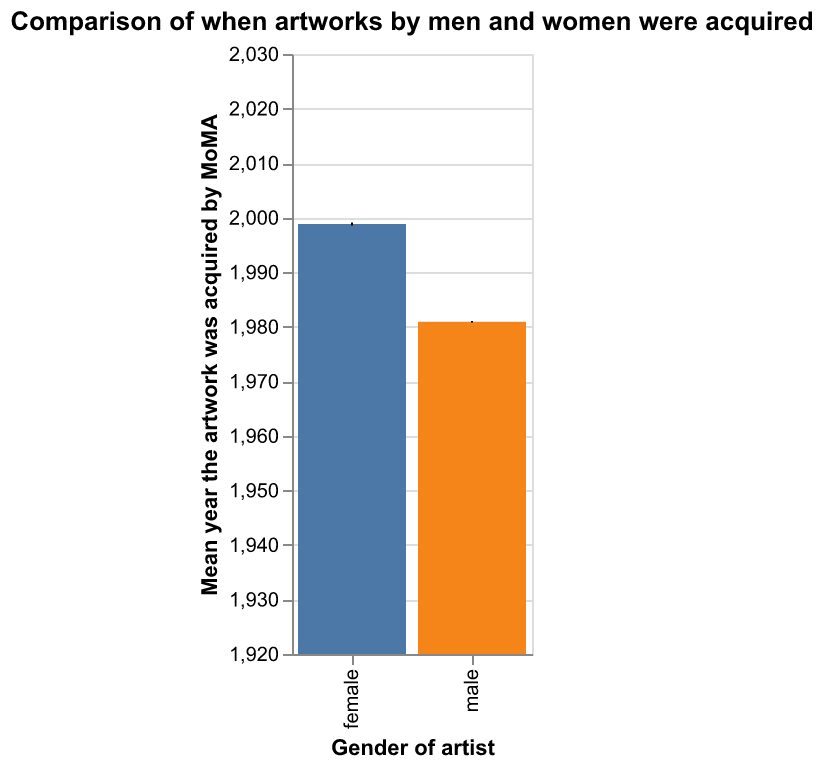

In [15]:
bar = alt.Chart(moma, title="Comparison of when artworks by men and women were acquired").mark_bar().encode(
    x=alt.X("Gender:N", title="Gender of artist"),
    y=alt.Y("mean(AcquiredYear):Q", title="Mean year the artwork was acquired by MoMA").scale(domain=(1920, 2024)),
    color=alt.Color("Gender:N", legend=None)
).properties(
    width=alt.Step(60)
)

error = alt.Chart(moma, title="Comparison of when artworks by men and women were acquired").mark_errorbar(extent="ci").encode(
    x=alt.X("Gender:N", title="Gender of artist"),
    y=alt.Y("mean(AcquiredYear):Q", title="Mean year the artwork was acquired by MoMA"),
)

bar + error

This bar plot shows a comparison of the means instead of the median and interquartile ranges. We can see that though the medians are more different, the means of these two groups are much closer together (indicating that some outliers may be skewing the results). However, we see very small or nonexistent confidence interval error bars on this plot. This could mean that the difference in means is statistically significant, but we will need to run a permutation test to be sure.

Since the female acquired year average is higher (i.e. more recent) on the both the box plot and the bar plot, I've decided to make this a one-tailed hypothesis test. I am trying to find out: are artworks by women *really* acquired more recently?

In [16]:
# Get two groups
artwork_date_male = moma[moma.Gender == "male"]['AcquiredYear']
artwork_date_female = moma[moma.Gender == "female"]['AcquiredYear']

# Calculate the difference in means
mean_diff = artwork_date_female.mean() - artwork_date_male.mean()
mean_diff

17.935649315104456

Now that I've determined the guidelines for my test I can find the observed difference in means. As you can see in the code above, on average works by women are acquired 17 or 18 years later than works by men. The codeblock below creates a function for reshuffling data to create 5000 random permutations. The distribution of these permutation means are then compared to the observed difference above.

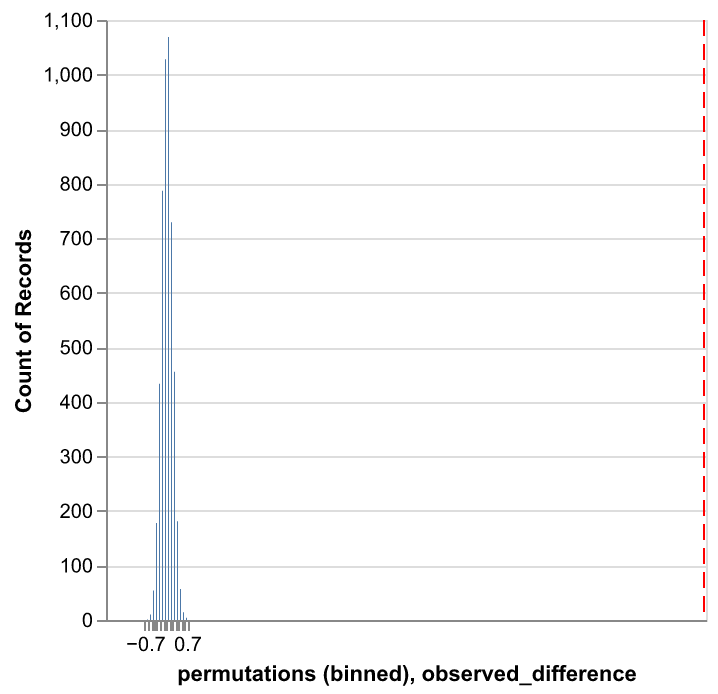

In [17]:
def simulate_two_groups(data1, data2):
    n = len(data1) #Get length of first group
    data = pd.concat([data1, data2]) #Get all data
    data = data.sample(frac=1) #Reshuffle all data
    group1 = data.iloc[:n] #Get random first group
    group2 = data.iloc[n:] #Get random second group
    return group1.mean() - group2.mean() #Calculate mean difference

permutations = ([simulate_two_groups(artwork_date_female,artwork_date_male)
               for i in range(5000)])
permutations = pd.DataFrame({'permutations':permutations})

# Create a histogram
histogram = alt.Chart(permutations).mark_bar().encode(
    x=alt.X("permutations:Q").bin(maxbins=20),
    y=alt.Y("count():Q")
)
permutations = permutations.assign(observed_difference=mean_diff) # Add the mean to the dataframe
# Add a vertical line
observed_line = alt.Chart(permutations).mark_rule(color="red", strokeDash=(8,4)).encode(
    x=alt.X("observed_difference")
)
# Combine the two plots
histogram + observed_line

The plot above shows the permutation distribution (in white) and the observed difference in means (as a red dotted line). The permutations almost never showed a difference greater than 1 year or less than -1 year. The red line is very far way from all of the permuation data, with the entire distribution less than the observed difference in means. To complete this interpretation, we will need to calculate a p-value.

In [18]:
p_value = np.mean(permutations.permutations > mean_diff)
p_value

0.0

By comparing the permutation data to the observed difference, we can calculate a p-value of 0.0, which is far less than the expected alpha of 0.05. In this case, $p<0.05$, meaning that our observed difference in means of 17 years is statistically significant. It is very unlikely to achieve this same result with a random assortment of artworks. In addition to this, though a difference of 17 years is fewer than we might expect from the exploratory data analysis above, this is also a practically significant result: 17 years is a relatively long amount of time.

Overall, this hypothesis test has helped us to infer what the full population of data might look like. In order to understand further, it's equally useful to use this data in a statistical model.

## Statistical Modeling with Random Forest

Given that the museum's practices around art made by men and women are so different, we might learn more by using a statistical model to predict an artists' gender based on the attributes of their artworks. Because I am predicting gender categories, I will need to use a *classification* model. I will attempt to use a few properties of both the artist and the artworks: the nationality of the artist, the year of their birth, the artwork's height and width, the year it was made, and the year it was acquired by MoMA. (Note that here I need to use the "MadeYear" and "AcquiredYear" numerical variables that I created in my data wrangling section.) Because this is a mixed set of predictors, both numerical and categorical, I have a lot of choices. But since date-related data is more discrete than continuous, I have chosen a model type, the Random Forest, that deals well with a mix of numerical and categorical variables.

To begin, I will use a single decision tree to determine if I have chosen my predictors well.

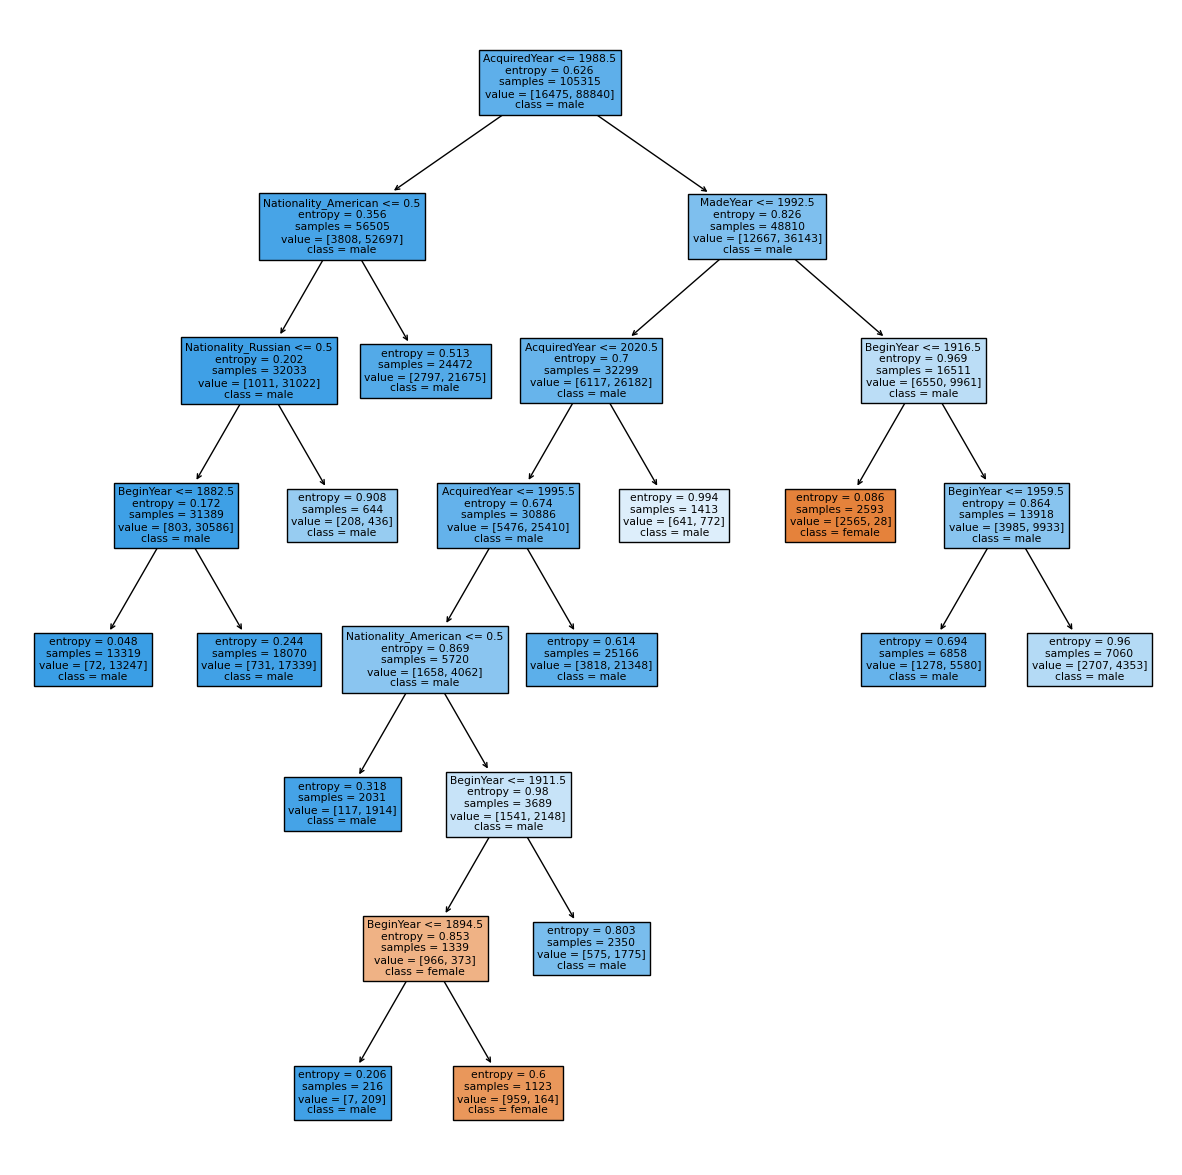

In [19]:
# Create variables for predictors and target
predictors = ['Nationality','BeginYear','Height (cm)','Width (cm)','MadeYear','AcquiredYear']
target = "Gender"

# Drop null values for selected columns
moma_predict = moma.dropna(subset=['Nationality','BeginYear','Height (cm)','Width (cm)','MadeYear','AcquiredYear','Gender'])

# Create X and y variables for modeling, using one-hot encoding 
X = pd.get_dummies(moma_predict[predictors])
y = moma_predict[target]

# Create decision tree model and fit it to entire data
dt = DecisionTreeClassifier(random_state=42,criterion='entropy',min_impurity_decrease=0.003)
dt.fit(X,y)

# Draw decision tree plot
# sns.set(rc={"figure.figsize":(15, 15)})
plt.figure(figsize=(15, 15))
plot_tree(dt, filled=True, feature_names=dt.feature_names_in_, class_names=dt.classes_)
plt.show()

This decision tree begins by splitting on the year the artwork was required. On the left side of the tree, when splitting by nationality, the tree struggles to identify any female artists. The model has more success on the right side of the tree, when splitting by date. This suggests that some predictors (features) are better than others. We can confirm this by looking at the feature importances for this tree.

In [20]:
for x,y in zip(dt.feature_names_in_,dt.feature_importances_):
    print(x,y)

BeginYear 0.35232213487884184
Height (cm) 0.0
Width (cm) 0.0
MadeYear 0.1075948726810155
AcquiredYear 0.3944539331608834
Nationality_Albanian 0.0
Nationality_Algerian 0.0
Nationality_American 0.113986571086963
Nationality_Argentine 0.0
Nationality_Australian 0.0
Nationality_Austrian 0.0
Nationality_Azerbaijani 0.0
Nationality_Bahamian 0.0
Nationality_Belgian 0.0
Nationality_Beninese 0.0
Nationality_Bolivian 0.0
Nationality_Bosnian 0.0
Nationality_Brazilian 0.0
Nationality_British 0.0
Nationality_Bulgarian 0.0
Nationality_Burkinabé 0.0
Nationality_Cameroonian 0.0
Nationality_Canadian 0.0
Nationality_Canadian Inuit 0.0
Nationality_Chilean 0.0
Nationality_Chinese 0.0
Nationality_Colombian 0.0
Nationality_Congolese 0.0
Nationality_Costa Rican 0.0
Nationality_Croatian 0.0
Nationality_Cuban 0.0
Nationality_Czech 0.0
Nationality_Danish 0.0
Nationality_Dutch 0.0
Nationality_Ecuadorian 0.0
Nationality_Egyptian 0.0
Nationality_Emirati 0.0
Nationality_Estonian 0.0
Nationality_Ethiopian 0.0
Nation

The list above shows all the feature importances for the predictors we chose (with the categorical predictor nationality split into its individual dummy variables). The list suggests that the dimension of an artwork (height and width) as well as the nationality of the artist aren't especially predictive of the artists' gender in this model. This is a little surprising based on what we discovered about the height of artworks in our exploratory section, but it also logically follows that the gender of the artist wouldn't affect the shape of the artwork, nor would it have any affect on their nationalities.

However, there's a problem with this model based on something we already observed in the exploratory section!

In [21]:
moma.Gender.value_counts()

Gender
male      120979
female     19608
Name: count, dtype: int64

There are more than 5 times as many male artists in our data than female artists! This will create a rare class problem: any model built on this data will get high accuracy simply by guessing the artist is male every time. To remedy this, I will include some *oversampling* of the female artists' data in my training set. Note: this oversampling would typically only occur in the training set, but I have oversampled both the training and test set to simplify the code. This approach will use *bootstrap sampling* to create a large set of female artists to identify.

In [22]:
# Select reduced set of predictors and target
predictors = ['BeginYear','MadeYear','AcquiredYear']
target = "Gender"

# Drop null values based on predictors and target
moma_predict = moma.dropna(subset=['BeginYear','MadeYear','AcquiredYear','Gender'])

# Get number of male artists in dataset
n_male = moma_predict.Gender.value_counts()[0]

# Separate male and female artists in data
male = moma_predict[moma_predict.Gender == 'male']
female = moma_predict[moma_predict.Gender == 'female']

# Bootstrap resample female artists to be equal to number of male artists
female = female.sample(n=n_male, replace=True)

# Put data back together
moma_predict = pd.concat([male,female])

# Verify with value counts
moma_predict.Gender.value_counts()

Gender
male      111992
female    111992
Name: count, dtype: int64

Now we're ready to continue our modeling code. This will be more reliable than my original model, which had very high precision but low recall.

In [23]:
# Get X and y variables for prediction
X = pd.get_dummies(moma_predict[predictors], drop_first=True)
y = moma_predict[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=0)

# Fit random forest model
rf = RandomForestClassifier(random_state=42, max_leaf_nodes=20)
rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=20, random_state=42)

In [24]:
predictions = rf.predict(X_test) # Get category predictions
categories = rf.classes_ # Get predicted classes
probabilities = pd.DataFrame(rf.predict_proba(X_test), columns=categories) # Get a dataframe of predicted probabilities
probabilities

,female,male
0,0.230055,0.769945
1,0.368141,0.631859
2,0.112075,0.887925
3,0.130142,0.869858
4,0.566794,0.433206
...,...,...
67191,0.578679,0.421321
67192,0.785041,0.214959
67193,0.446660,0.553340
67194,0.092276,0.907724


After setting up the random forest classifier and examining the predicted probabilities above, I am reasonably confident in this model. While some of the probabilites show about a 50-50 split in the model's certainty that an artist is a man or a woman, a lot of the visible probabilities in this list are 60% and above for one of the two categories. This may indicate that our validation (below) will show an accurate model.

In [25]:
for f,i in zip(rf.feature_names_in_, rf.feature_importances_):
    print(f,i)

BeginYear 0.3626260091372285
MadeYear 0.290751730703907
AcquiredYear 0.34662226015886444


As I suggested previously, reducing to just these three predictors has left us with relatively high feature importances across the board. This tells us a lot about our data, since it suggests that it's possible to predict the gender of the artist whose work is in MoMA based only on three dates: when the artist was born, when their artwork was made, and when the artwork was acquired. There's clearly a pattern in MoMA's collection practices.

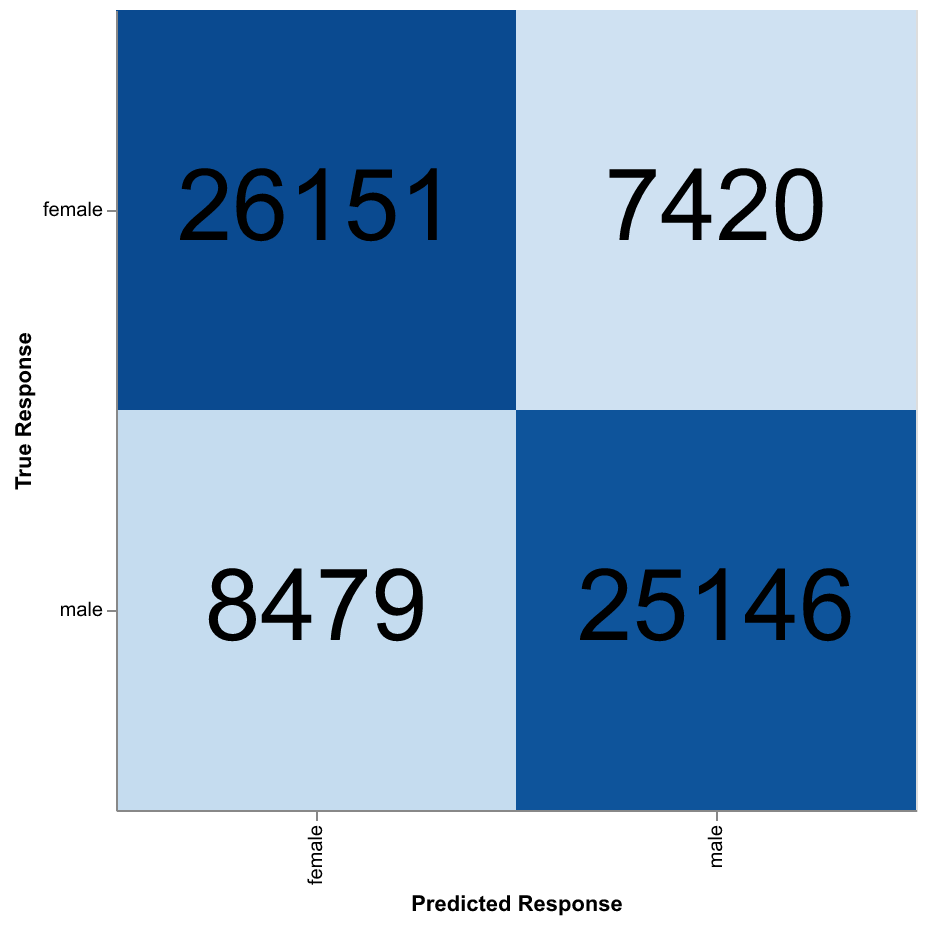

In [26]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat,index=categories,columns=categories)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text

The confusing matrix above shows the predicted responses for all the data in our test set. As we observed in the predicted probabilities, the model seemed to do a decent job at predicting artists of both genders. There are many more true positives (in the top left) and true negatives (in bottom right) than there are false positives and false negatives. However, there are still a lot of false predictions (more than 15,000), indicating that our model could have even better performance.

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      female       0.76      0.78      0.77     33571
        male       0.77      0.75      0.76     33625

    accuracy                           0.76     67196
   macro avg       0.76      0.76      0.76     67196
weighted avg       0.76      0.76      0.76     67196



In the classfication report above, you can see that overall our model is $76\%$ accurate, with similar precision for both categories ($75\%$ for women and $76\%$ for men), and similar recall as well ($77\%$ for women and $75$ for men). This is much better than my original model before dealing with the rare class problem, which had precision for men in the 90s but recall only around $10\%$.

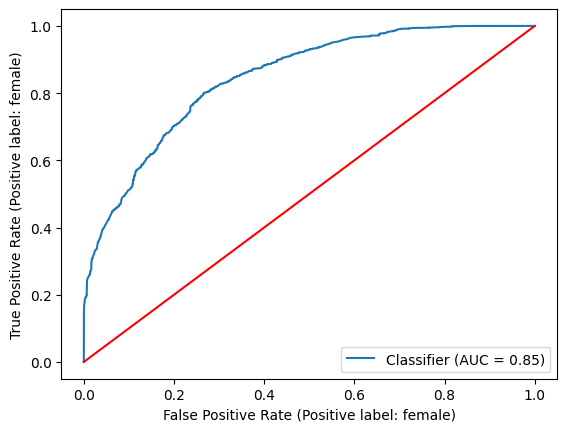

In [28]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'r')

Because this is a binary classifier, we can also create an ROC curve. The ROC curve above confirms the overall accuracy of the model: there is a consistent curved line that takes up most of the graph. Area under the curve (AUC) is $85\%$, which indicates that the true positive rate for our model is higher than the false positive rate.  The last thing to determine is whether our model's accuracy in this split of the data will remain at ~$75\%$ after cross-validation.

In [29]:
scores = cross_val_score(rf, X, y, cv=5)
print(f"{scores.mean():.2} accuracy with standard deviation {scores.std():.2}")

0.7 accuracy with standard deviation 0.11


In the code above I ran 5-fold cross-validation, splitting the data differently each time to reserve different data for testing. Across these runs, I got an average of $70\%$ accuracy, which is not as high as my original run but not bad for a first attempt at building a classifier. The standard deviation was a moderate $0.11$, suggesting that there's some variance in the results that might be reduced in a better model.

# Conclusion



Overall, there are clear patterns in the MoMA data that allow us to predict the gender of artists, and the most useful predictors turned out to be the dates that the artworks were made and acquired, as well as the year the artist was born. In both the EDA and modeling sections, I identified temporal patterns in how the museum collected its artworks: over time, more art by women was acquired, but overall there are still far more male artists in the collection. This pattern was visible in my hypothesis test, which concluded that the more recent dates for the acquisition of women's art was statistically significant, at around 16 years on average. And the patterns helped the random forest classifier to predict with around $68\%$ accuracy after cross-validation.

However, there's a strong gender imbalance in the data that created problems for my analysis: there are far more male artists than female ones, and I had to oversample the female artists to create balanced training data for my model. Furthermore, I had to filter out the small number of non-binary artists, and there may be more gender nonconforming artists that the data set doesn't identify. Lastly, I eliminated any artworks made by more than one person to simplify the analysis, but this omission may have obscured some of the patterns in the data. Many of these same problems also show up in [*FiveThirtyEight*'s analysis of this data](https://fivethirtyeight.com/features/a-nerds-guide-to-the-2229-paintings-at-moma/), but this study only looks a paintings instead of all artworks. In future studies, I might attempt to work with the `Artists.csv` file that MoMA makes available in order to remedy some of these imbalances and create a more accurate model. Overall, I feel that I've discovered a lot about how the gender of artists in MoMA's collection has changed over time.

Roeder, Oliver. “A Nerd’s Guide to the 2,229 Paintings at Moma.” *FiveThirtyEight*, 28 Aug. 2015, [fivethirtyeight.com/features/a-nerds-guide-to-the-2229-paintings-at-moma/](https://fivethirtyeight.com/features/a-nerds-guide-to-the-2229-paintings-at-moma/). 